In [172]:
# Let's start importing all the necessary Libraries we are going to use for the analysis, as we go forward it's important to keep updating. 
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
from sklearn.preprocessing import LabelEncoder
pn.extension()
import sklearn.preprocessing as preproc
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Let's start discovering the head of the Dataframe
df=pd.read_csv("ARA02.20221209230851.xls")
df.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03388V04075,Type of Land Use,C02196V02652,Region,UNIT,VALUE
0,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,-,State,Euro per Acre,6389.783163
1,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE11,Border,Euro per Acre,4685.224509
2,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE12,Midland,Euro per Acre,7114.568810
3,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE13,West,Euro per Acre,4496.514077
4,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE21,Dublin,Euro per Acre,10117.156674


In [3]:
# In order to know details about the dataset, we are going to read more columns.
df.tail(1000)

,STATISTIC,Statistic Label,TLIST(A1),Year,C03388V04075,Type of Land Use,C02196V02652,Region,UNIT,VALUE
728,ARA02C04,Mean Price per Hectare,2015,2015,3,Permanent Grassland,IE25,South-West,Euro per Hectare,1.390033e+04
729,ARA02C04,Mean Price per Hectare,2016,2016,1,All Land Types,-,State,Euro per Hectare,1.363934e+04
730,ARA02C04,Mean Price per Hectare,2016,2016,1,All Land Types,IE11,Border,Euro per Hectare,8.958609e+03
731,ARA02C04,Mean Price per Hectare,2016,2016,1,All Land Types,IE12,Midland,Euro per Hectare,1.283137e+04
732,ARA02C04,Mean Price per Hectare,2016,2016,1,All Land Types,IE13,West,Euro per Hectare,7.841999e+03
...,...,...,...,...,...,...,...,...,...,...
1723,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE21,Dublin,Euro,2.670000e+06
1724,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE22,Mid-East,Euro,2.886356e+07
1725,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE23,Mid-West,Euro,3.145546e+07
1726,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE24,South-East,Euro,1.739611e+07


### Comments:

- In this first phase the General view of our Dataset help us to discover and understand what we are looking at, to understand the problem we want to solve, thinking about the entire dataset and the meaning of the variables.


- As we can see our Dataset contains different values per column which need to be grouped for the analysis, and also this will help us to perform better and prepare for Machine learning. 

In [4]:
# Let's find the values in our dataset.
df.describe()

,TLIST(A1),Year,C03388V04075,VALUE
count,1728.000000,1728.000000,1728.000000,1.608000e+03
mean,2016.500000,2016.500000,2.000000,7.286694e+06
std,2.291951,2.291951,0.816733,3.733202e+07
min,2013.000000,2013.000000,1.000000,4.000000e+00
25%,2014.750000,2014.750000,1.000000,3.214028e+03
50%,2016.500000,2016.500000,2.000000,9.322434e+03
75%,2018.250000,2018.250000,3.000000,2.191193e+04
max,2020.000000,2020.000000,3.000000,4.426477e+08


### Comments:

- *Describe* provides descriptive information which help us to know more about the dataset. This includes statistics that summarize the central tendency of the variable, dispersion, the presence of empty values and shape.

In [5]:
# In order to know the shape of our dataset, which contains 1728 rows and 10 features.
df.shape

(1728, 10)

In [6]:
# Important to display the values of our dataframes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATISTIC         1728 non-null   object 
 1   Statistic Label   1728 non-null   object 
 2   TLIST(A1)         1728 non-null   int64  
 3   Year              1728 non-null   int64  
 4   C03388V04075      1728 non-null   int64  
 5   Type of Land Use  1728 non-null   object 
 6   C02196V02652      1728 non-null   object 
 7   Region            1728 non-null   object 
 8   UNIT              1728 non-null   object 
 9   VALUE             1608 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 135.1+ KB


In [7]:
# This help us to determine if there are any missing values.
df.isnull().sum()

STATISTIC             0
Statistic Label       0
TLIST(A1)             0
Year                  0
C03388V04075          0
Type of Land Use      0
C02196V02652          0
Region                0
UNIT                  0
VALUE               120
dtype: int64

### Comments: 

- Since the feature VALUE contains a total of *120 => Null values* Which are not going to affect the dataset, we decide to drop them, specially because for our analysis "Value is one of the main features" since we don't want to damage the data.


- Since the fact VALUE, contains especific values, and those are relevant for our analysis,  because can not be filled with any other, we Drop Nun values. 

In [8]:
# Since the fact VALUE contains especific values,and we can not fill this Nun Values with any other value, we Drop them. 
df.dropna(subset=["VALUE"], inplace=True) 

In [9]:
# Checking updates for Nun Values
df.isnull().sum()

STATISTIC           0
Statistic Label     0
TLIST(A1)           0
Year                0
C03388V04075        0
Type of Land Use    0
C02196V02652        0
Region              0
UNIT                0
VALUE               0
dtype: int64

### Comments: 

- As we can see non of the columns have Null Values, We just dropped the rows for VALUE, since it is an unic value which can not be filled with another.

In [10]:
# Check updates for the shape of the Dataset. 
df.shape

(1608, 10)

In [11]:
# Display data types in order to know more about the Dataset.
df.dtypes 

STATISTIC            object
Statistic Label      object
TLIST(A1)             int64
Year                  int64
C03388V04075          int64
Type of Land Use     object
C02196V02652         object
Region               object
UNIT                 object
VALUE               float64
dtype: object

In [12]:
# Let's rename the columns to avoid spaces, also It will help us with our analysis. 
df = df.rename(columns={"Statistic Label": "STATISTIC_LABEL", "Type of Land Use": "TYPE_OF_LAND_USE", "Year": "YEAR", "Region": "REGION"})

In [13]:
# Count the columns help us to know in detail the shape for each feature.
df.count() 

STATISTIC           1608
STATISTIC_LABEL     1608
TLIST(A1)           1608
YEAR                1608
C03388V04075        1608
TYPE_OF_LAND_USE    1608
C02196V02652        1608
REGION              1608
UNIT                1608
VALUE               1608
dtype: int64

In [14]:
# For deep exploring the features, let's identify the values for: STATISTIC
df["STATISTIC"].value_counts()

ARA02C01    201
ARA02C02    201
ARA02C03    201
ARA02C04    201
ARA02C05    201
ARA02C06    201
ARA02C07    201
ARA02C08    201
Name: STATISTIC, dtype: int64

In [15]:
# For deep exploring the features, let's identify the values for: STATISTIC_LABEL
df["STATISTIC_LABEL"].unique()

array(['Median Price per Acre', 'Median Price per Hectare',
       'Mean Price per Acre', 'Mean Price per Hectare',
       'Number of Transactions', 'Volume of Land Sold Acres',
       'Volume of Land Sold Hectares', 'Value of Land Sold'], dtype=object)

In [16]:
df["STATISTIC_LABEL"].value_counts()

Median Price per Acre           201
Median Price per Hectare        201
Mean Price per Acre             201
Mean Price per Hectare          201
Number of Transactions          201
Volume of Land Sold Acres       201
Volume of Land Sold Hectares    201
Value of Land Sold              201
Name: STATISTIC_LABEL, dtype: int64

### Comments: 

- Thanks to Value Counts, we know in details the values for the features: STATISTIC and STATISTIC_LABEL, based in the output we can conclude that both of them provide same values, STATISTIC_LABEL is the dictionary to understand the values for STATISTIC.  

In [17]:
# For deep exploring the features, let's identify the values for: TLIST(A1)
df["TLIST(A1)"].value_counts()

2013    208
2017    208
2018    208
2014    200
2015    200
2016    200
2019    192
2020    192
Name: TLIST(A1), dtype: int64

In [18]:
# For deep exploring the features, let's identify the values for: YEAR
df["YEAR"].value_counts()

2013    208
2017    208
2018    208
2014    200
2015    200
2016    200
2019    192
2020    192
Name: YEAR, dtype: int64

### Comments:

- Value Counts, help us to know in details the values for the features: TLIST(A1) and YEAR, based in the output we can determine the similarity in their values, they both provide the years in regards to the Data. 

In [19]:
# For deep exploring the features, let's identify the values for: C03388V04075
df["C03388V04075"].value_counts()

1    576
3    576
2    456
Name: C03388V04075, dtype: int64

In [20]:
# Let's find the values for the feature, in order to identify relation between features.
df["C03388V04075"].describe()

count    1608.000000
mean        2.000000
std         0.846678
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: C03388V04075, dtype: float64

In [21]:
# For deep exploring the features, let's identify the values for: TYPE_OF_LAND_USE.
df["TYPE_OF_LAND_USE"].value_counts()

All Land Types         576
Permanent Grassland    576
Arable Land            456
Name: TYPE_OF_LAND_USE, dtype: int64

### Comments:

- Because of Value Counts, we are able to comprehend the values for: C03388V04075 and TYPE_OF_LAND_USE in great depth. Based on the output, we can say that both of them supply the same values, with TYPE_OF_LAND_USE serving as a dictionary for C03388V04075 values.

In [22]:
# Let's find the values for the feature. 
df["C02196V02652"].unique()

array(['-', 'IE11', 'IE12', 'IE13', 'IE21', 'IE22', 'IE23', 'IE24',
       'IE25'], dtype=object)

In [23]:
# For deep exploring the features, let's identify the values for: C02196V02652
df["C02196V02652"].value_counts()

-       192
IE12    192
IE21    192
IE22    192
IE24    192
IE25    184
IE23    168
IE11    160
IE13    136
Name: C02196V02652, dtype: int64

In [24]:
# Indentify the values for: REGION
df["REGION"].unique()

array(['State', 'Border', 'Midland', 'West', 'Dublin', 'Mid-East',
       'Mid-West', 'South-East', 'South-West'], dtype=object)

In [25]:
# For deep exploring the features, let's identify the values for: REGION
df["REGION"].value_counts()

State         192
Midland       192
Dublin        192
Mid-East      192
South-East    192
South-West    184
Mid-West      168
Border        160
West          136
Name: REGION, dtype: int64

### Comments: 

- We can fully understand the values for: C02196V02652 and REGION thanks to Value Counts. REGION, acts as a dictionary for C02196V02652 values, and the outcome indicates that both of them provide the same values.

In [26]:
# For deep exploring the features, let's identify the values for: UNIT
df["UNIT"].value_counts()

Number              603
Euro per Acre       402
Euro per Hectare    402
Euro                201
Name: UNIT, dtype: int64

In [27]:
# Indentify the values for the feature. 
df["VALUE"].unique()

array([6.38978316e+03, 4.68522451e+03, 7.11456881e+03, ...,
       2.88635644e+07, 3.14554650e+07, 1.73961122e+07])

In [28]:
# For deep exploring the features, let's identify the values for: VALUE
df["VALUE"].value_counts()

1.100000e+01    5
5.000000e+00    4
7.000000e+00    4
4.000000e+00    4
8.000000e+00    4
               ..
8.910541e+03    1
6.884928e+03    1
8.793197e+03    1
1.100955e+04    1
1.739611e+07    1
Name: VALUE, Length: 1442, dtype: int64

In [29]:
# Let's explore the values for the feature, in order to identify relation between features.
df["VALUE"].describe()

count    1.608000e+03
mean     7.286694e+06
std      3.733202e+07
min      4.000000e+00
25%      3.214028e+03
50%      9.322434e+03
75%      2.191193e+04
max      4.426477e+08
Name: VALUE, dtype: float64

In [30]:
# Let's group the numerical values related with the feature: VALUE
df.groupby("VALUE").mean()

,TLIST(A1),YEAR,C03388V04075
VALUE,,,
4.000000e+00,2018.000000,2018.000000,2.0
5.000000e+00,2015.250000,2015.250000,2.0
6.000000e+00,2014.666667,2014.666667,2.0
7.000000e+00,2018.750000,2018.750000,2.5
8.000000e+00,2016.750000,2016.750000,2.5
...,...,...,...
3.892198e+08,2014.000000,2014.000000,3.0
3.937341e+08,2013.000000,2013.000000,3.0
3.967758e+08,2017.000000,2017.000000,1.0


In [31]:
#Let's visualilze basic statistics values from our dataframe in regards to VALUE feature. 
df.groupby("VALUE").describe()

TLIST(A1)                                                  \
                 count         mean       std     min      25%     50%   
VALUE                                                                    
4.000000e+00       4.0  2018.000000  1.414214  2017.0  2017.00  2017.5   
5.000000e+00       4.0  2015.250000  2.217356  2013.0  2013.75  2015.0   
6.000000e+00       3.0  2014.666667  1.527525  2013.0  2014.00  2015.0   
7.000000e+00       4.0  2018.750000  1.892969  2016.0  2018.25  2019.5   
8.000000e+00       4.0  2016.750000  2.061553  2015.0  2015.00  2016.5   
...                ...          ...       ...     ...      ...     ...   
3.892198e+08       1.0  2014.000000       NaN  2014.0  2014.00  2014.0   
3.937341e+08       1.0  2013.000000       NaN  2013.0  2013.00  2013.0   
3.967758e+08       1.0  2017.000000       NaN  2017.0  2017.00  2017.0   
4.364767e+08       1.0  2013.000000       NaN  2013.0  2013.00  2013.0   
4.426477e+08       1.0  2014.000000       NaN  2014.0  2014.00  2014.0   

                               YEAR               ...                   \
                  75%     max count         mean  ...      75%     max   
VALUE                                             ...                    
4.000000e+00  2018.50  2020.0   4.0  2018.000000  ...  2018.50  2020.0   
5.000000e+00  2016.50  2018.0   4.0  2015.250000  ...  2016.50  2018.0   
6.000000e+00  2015.50  2016.0   3.0  2014.666667  ...  2015.50  2016.0   
7.000000e+00  2020.00  2020.0   4.0  2018.750000  ...  2020.00  2020.0   
8.000000e+00  2018.25  2019.0   4.0  2016.750000  ...  2018.25  2019.0   
...               ...     ...   ...          ...  ...      ...     ...   
3.892198e+08  2014.00  2014.0   1.0  2014.000000  ...  2014.00  2014.0   
3.937341e+08  2013.00  2013.0   1.0  2013.000000  ...  2013.00  2013.0   
3.967758e+08  2017.00  2017.0   1.0  2017.000000  ...  2017.00  2017.0   
4.364767e+08  2013.00  2013.0   1.0  2013.000000  ...  2013.00  2013.0   
4.426477e+08  2014.00  2014.0   1.0  2014.000000  ...  2014.00  2014.0   

             C03388V04075                                         
                    count mean      std  min  25%  50%  75%  max  
VALUE                                                             
4.000000e+00          4.0  2.0  0.00000  2.0  2.0  2.0  2.0  2.0  
5.000000e+00          4.0  2.0  0.00000  2.0  2.0  2.0  2.0  2.0  
6.000000e+00          3.0  2.0  0.00000  2.0  2.0  2.0  2.0  2.0  
7.000000e+00          4.0  2.5  0.57735  2.0  2.0  2.5  3.0  3.0  
8.000000e+00          4.0  2.5  0.57735  2.0  2.0  2.5  3.0  3.0  
...                   ...  ...      ...  ...  ...  ...  ...  ...  
3.892198e+08          1.0  3.0      NaN  3.0  3.0  3.0  3.0  3.0  
3.937341e+08          1.0  3.0      NaN  3.0  3.0  3.0  3.0  3.0  
3.967758e+08          1.0  1.0      NaN  1.0  1.0  1.0  1.0  1.0  
4.364767e+08          1.0  1.0      NaN  1.0  1.0  1.0  1.0  1.0  
4.426477e+08          1.0  1.0      NaN  1.0  1.0  1.0  1.0  1.0  

[1442 rows x 24 columns]

- ## Convert: Categorical Values => Numerical Values 

#### As we are know more in detail our data and recognize the features it's time to convert the Categorical values into Numerical Values in order to prepare it to perform better for Machine Learning. 

In [32]:
le = LabelEncoder()

In [33]:
df["P_STATISTIC"] = le.fit_transform(df.STATISTIC)

In [34]:
df["CODE_REGION"] = le.fit_transform(df.C02196V02652)

In [35]:
#df["UNITS"] = pd.factorize(df.UNIT)[1]

In [36]:
df["UNITS"] = le.fit_transform(df.UNIT)

In [37]:
df.head()

,STATISTIC,STATISTIC_LABEL,TLIST(A1),YEAR,C03388V04075,TYPE_OF_LAND_USE,C02196V02652,REGION,UNIT,VALUE,P_STATISTIC,CODE_REGION,UNITS
0,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,-,State,Euro per Acre,6389.783163,0,0,1
1,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE11,Border,Euro per Acre,4685.224509,0,1,1
2,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE12,Midland,Euro per Acre,7114.568810,0,2,1
3,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE13,West,Euro per Acre,4496.514077,0,3,1
4,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE21,Dublin,Euro per Acre,10117.156674,0,4,1


In [38]:
df["UNITS"].value_counts()

3    603
1    402
2    402
0    201
Name: UNITS, dtype: int64

In [39]:
df.tail()

,STATISTIC,STATISTIC_LABEL,TLIST(A1),YEAR,C03388V04075,TYPE_OF_LAND_USE,C02196V02652,REGION,UNIT,VALUE,P_STATISTIC,CODE_REGION,UNITS
1723,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE21,Dublin,Euro,2670000.00,7,4,0
1724,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE22,Mid-East,Euro,28863564.40,7,5,0
1725,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE23,Mid-West,Euro,31455465.00,7,6,0
1726,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE24,South-East,Euro,17396112.24,7,7,0
1727,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE25,South-West,Euro,4446462.00,7,8,0


### Comments:

- Thanks Groupby we can group the Numerical Values and find relationship with features, also we can obtain the Mean, Min, and Max values which help us in order to understand better our data. 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 0 to 1727
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATISTIC         1608 non-null   object 
 1   STATISTIC_LABEL   1608 non-null   object 
 2   TLIST(A1)         1608 non-null   int64  
 3   YEAR              1608 non-null   int64  
 4   C03388V04075      1608 non-null   int64  
 5   TYPE_OF_LAND_USE  1608 non-null   object 
 6   C02196V02652      1608 non-null   object 
 7   REGION            1608 non-null   object 
 8   UNIT              1608 non-null   object 
 9   VALUE             1608 non-null   float64
 10  P_STATISTIC       1608 non-null   int32  
 11  CODE_REGION       1608 non-null   int32  
 12  UNITS             1608 non-null   int32  
dtypes: float64(1), int32(3), int64(3), object(6)
memory usage: 157.0+ KB


In [41]:
# Let's find the values in our dataset.
df.describe()

,TLIST(A1),YEAR,C03388V04075,VALUE,P_STATISTIC,CODE_REGION,UNITS
count,1608.000000,1608.000000,1608.000000,1.608000e+03,1608.000000,1608.000000,1608.000000
mean,2016.462687,2016.462687,2.000000,7.286694e+06,3.500000,4.044776,1.875000
std,2.281900,2.281900,0.846678,3.733202e+07,2.292001,2.610206,1.053596
min,2013.000000,2013.000000,1.000000,4.000000e+00,0.000000,0.000000,0.000000
25%,2014.000000,2014.000000,1.000000,3.214028e+03,1.750000,2.000000,1.000000
50%,2016.000000,2016.000000,2.000000,9.322434e+03,3.500000,4.000000,2.000000
75%,2018.000000,2018.000000,3.000000,2.191193e+04,5.250000,6.000000,3.000000
max,2020.000000,2020.000000,3.000000,4.426477e+08,7.000000,8.000000,3.000000


In [42]:

df.value_counts()

STATISTIC  STATISTIC_LABEL            TLIST(A1)  YEAR  C03388V04075  TYPE_OF_LAND_USE     C02196V02652  REGION      UNIT           VALUE         P_STATISTIC  CODE_REGION  UNITS
ARA02C01   Median Price per Acre      2013       2013  1             All Land Types       -             State       Euro per Acre  6.389783e+03  0            0            1        1
ARA02C06   Volume of Land Sold Acres  2015       2015  2             Arable Land          IE21          Dublin      Number         3.414744e+02  5            4            3        1
                                                       3             Permanent Grassland  IE23          Mid-West    Number         1.033334e+04  5            6            3        1
                                                                                          IE22          Mid-East    Number         5.160343e+03  5            5            3        1
                                                                                          IE21 

# Defining variables

- ##### STATISTIC: Categorical variable, variable = contain 8 categories.

- ##### STATISTIC_LABEL: Categorical variable = contain 8 categories, which are the diccionary for STATISTIC.

- ##### TLIST(A1): Numerical variable, Variable = min: 2013, max: 2020

- ##### YEAR: Numerical variable, Variable = min: 2013, max: 2020

- ##### C03388V04075: Numerical variable = min: 1, max: 3

- ##### TYPE_OF_LAND_USE: Categorical variable = contain 3 categories, which are the diccionary for C03388V04075.

- ##### C02196V02652: Categorical Variable, Variable = contain 9 categories

- ##### Region: Categorical Variable, Variable = contain 9 categories, which are the diccionary for C02196V02652.

- ##### UNIT: Categorical variable, Variable = contain 4 categories

- ##### VALUE: Categorical variable, Variable = min 4.000000e+00, max 4.426477e+08

- ##### P_STATISTIC: Numerical variable, Variable = min: 0, max: 7

- ##### CODE_REGION: Numerical variable, Variable = min: 0, max: 8

- ##### UNITS: Numerical variable = min: 1, max: 3


## Time to drop the columns that appear twice (Same Values).

##### After exploring every column and feature we know that STATISTIC,TLIST(A1), C03388V04075 and C02196V02652, contain same values with:
##### STATISTIC_LABEL, YEAR, TYPE_OF_LAND_USE, and REGION, P_STATISTIC, CODE_REGION, UNIT.
##### In order to prepare the Dataset for Machine Learning we are going to keep the features with Numerical values, and we are going to drop the features with Categorical Values that appear twice.


In [43]:
# We decide to drop the columns which are not providing any additional value to the analysis. (Different column name - Same values)
df.drop(columns=["STATISTIC_LABEL", "TLIST(A1)", "TYPE_OF_LAND_USE", "REGION", "STATISTIC", "C02196V02652", "UNIT"], inplace=True) 


In [44]:
# Let's rename the columns to identify them easier.
df = df.rename(columns={"C03388V04075": "TYPE_OF_LAND_USE"})

In [45]:
# Let's check updates and confirm changes are applied.
df.head()

,YEAR,TYPE_OF_LAND_USE,VALUE,P_STATISTIC,CODE_REGION,UNITS
0,2013,1,6389.783163,0,0,1
1,2013,1,4685.224509,0,1,1
2,2013,1,7114.568810,0,2,1
3,2013,1,4496.514077,0,3,1
4,2013,1,10117.156674,0,4,1


In [46]:
# move VALUE to the last position
# save 'VALUE' into a temporary variable
last_column = df.pop('VALUE')

# insert column using insert(position,column_name, last_column) function
df.insert(5, 'VALUE', last_column)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              1608 non-null   int64  
 1   TYPE_OF_LAND_USE  1608 non-null   int64  
 2   P_STATISTIC       1608 non-null   int32  
 3   CODE_REGION       1608 non-null   int32  
 4   UNITS             1608 non-null   int32  
 5   VALUE             1608 non-null   float64
dtypes: float64(1), int32(3), int64(2)
memory usage: 69.1 KB


## Grouping features based on Statistics Labels

- ### Grouping column as an argument to the funtion 

In [48]:
# Group the features help us for clustering and visualize better the values.
groups = df.groupby("P_STATISTIC")
groups

In [49]:
# Let's start printing by group of values and converting a dataframe for each group.
for P_STATISTIC, P_STATISTIC_DF in groups:
    print(P_STATISTIC)
    print(P_STATISTIC_DF)

0
     YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VALUE
0    2013                 1            0            0      1   6389.783163
1    2013                 1            0            1      1   4685.224509
2    2013                 1            0            2      1   7114.568810
3    2013                 1            0            3      1   4496.514077
4    2013                 1            0            4      1  10117.156674
..    ...               ...          ...          ...    ...           ...
211  2020                 3            0            4      1  14988.380258
212  2020                 3            0            5      1   8816.694270
213  2020                 3            0            6      1   8013.589445
214  2020                 3            0            7      1  10943.937517
215  2020                 3            0            8      1   8500.328126

[201 rows x 6 columns]
1
     YEAR  TYPE_OF_LAND_USE  P_STATISTIC  CODE_REGION  UNITS         VAL

In [50]:
# let's group and filter 0 values.
groups.get_group(0)

,YEAR,TYPE_OF_LAND_USE,P_STATISTIC,CODE_REGION,UNITS,VALUE
0,2013,1,0,0,1,6389.783163
1,2013,1,0,1,1,4685.224509
2,2013,1,0,2,1,7114.568810
3,2013,1,0,3,1,4496.514077
4,2013,1,0,4,1,10117.156674
...,...,...,...,...,...,...
211,2020,3,0,4,1,14988.380258
212,2020,3,0,5,1,8816.694270
213,2020,3,0,6,1,8013.589445
214,2020,3,0,7,1,10943.937517


In [51]:
# let's group and filter 1 values.
groups.get_group(1)

,YEAR,TYPE_OF_LAND_USE,P_STATISTIC,CODE_REGION,UNITS,VALUE
216,2013,1,1,0,2,15789.473684
217,2013,1,1,1,2,11577.424023
218,2013,1,1,2,2,17580.455259
219,2013,1,1,3,2,11111.111111
220,2013,1,1,4,2,25000.000000
...,...,...,...,...,...,...
427,2020,3,1,4,2,37037.037037
428,2020,3,1,5,2,21786.492375
429,2020,3,1,6,2,19801.980198
430,2020,3,1,7,2,27043.016802


In [52]:
# let's group and filter 2 values.
groups.get_group(2)

,YEAR,TYPE_OF_LAND_USE,P_STATISTIC,CODE_REGION,UNITS,VALUE
432,2013,1,2,0,1,6088.937760
433,2013,1,2,1,1,4429.375739
434,2013,1,2,2,1,6839.090241
435,2013,1,2,3,1,3818.250242
436,2013,1,2,4,1,11231.717516
...,...,...,...,...,...,...
643,2020,3,2,4,1,8635.118140
644,2020,3,2,5,1,7595.664047
645,2020,3,2,6,1,7873.667654
646,2020,3,2,7,1,10829.386725


In [53]:
# let's group and filter 3 values.
groups.get_group(3)

,YEAR,TYPE_OF_LAND_USE,P_STATISTIC,CODE_REGION,UNITS,VALUE
648,2013,1,3,0,2,15046.069651
649,2013,1,3,1,2,10945.208920
650,2013,1,3,2,2,16899.733941
651,2013,1,3,3,2,9435.087261
652,2013,1,3,4,2,27754.135567
...,...,...,...,...,...,...
859,2020,3,3,4,2,21337.808679
860,2020,3,3,5,2,18769.265644
861,2020,3,3,6,2,19456.226457
862,2020,3,3,7,2,26759.956067


In [54]:
# let's group and filter 4 values.
groups.get_group(4)

,YEAR,TYPE_OF_LAND_USE,P_STATISTIC,CODE_REGION,UNITS,VALUE
864,2013,1,4,0,3,3980.0
865,2013,1,4,1,3,597.0
866,2013,1,4,2,3,296.0
867,2013,1,4,3,3,956.0
868,2013,1,4,4,3,24.0
...,...,...,...,...,...,...
1075,2020,3,4,4,3,7.0
1076,2020,3,4,5,3,189.0
1077,2020,3,4,6,3,247.0
1078,2020,3,4,7,3,114.0


In [55]:
# let's group and filter 5 values.
groups.get_group(5)

,YEAR,TYPE_OF_LAND_USE,P_STATISTIC,CODE_REGION,UNITS,VALUE
1080,2013,1,5,0,3,71683.554317
1081,2013,1,5,1,3,9628.816982
1082,2013,1,5,2,3,6092.843275
1083,2013,1,5,3,3,15160.830749
1084,2013,1,5,4,3,569.428762
...,...,...,...,...,...,...
1291,2020,3,5,4,3,309.202487
1292,2020,3,5,5,3,3800.005401
1293,2020,3,5,6,3,3995.020666
1294,2020,3,5,7,3,1606.380184


In [56]:
# let's group and filter 6 values.
groups.get_group(6)

,YEAR,TYPE_OF_LAND_USE,P_STATISTIC,CODE_REGION,UNITS,VALUE
1296,2013,1,6,0,3,29009.35
1297,2013,1,6,1,3,3896.65
1298,2013,1,6,2,3,2465.69
1299,2013,1,6,3,3,6135.38
1300,2013,1,6,4,3,230.44
...,...,...,...,...,...,...
1507,2020,3,6,4,3,125.13
1508,2020,3,6,5,3,1537.81
1509,2020,3,6,6,3,1616.73
1510,2020,3,6,7,3,650.08


In [57]:
# let's group and filter 7 values.
groups.get_group(7) 

,YEAR,TYPE_OF_LAND_USE,P_STATISTIC,CODE_REGION,UNITS,VALUE
1512,2013,1,7,0,0,4.364767e+08
1513,2013,1,7,1,0,4.264965e+07
1514,2013,1,7,2,0,4.166950e+07
1515,2013,1,7,3,0,5.788785e+07
1516,2013,1,7,4,0,6.395663e+06
...,...,...,...,...,...,...
1723,2020,3,7,4,0,2.670000e+06
1724,2020,3,7,5,0,2.886356e+07
1725,2020,3,7,6,0,3.145546e+07
1726,2020,3,7,7,0,1.739611e+07


In [58]:
# Let's identify the minimun values per group of P_STATISTIC. 
groups.min()

,YEAR,TYPE_OF_LAND_USE,CODE_REGION,UNITS,VALUE
P_STATISTIC,,,,,
0,2013,1,0,1,4496.514077
1,2013,1,0,2,11111.111111
2,2013,1,0,1,3071.470005
3,2013,1,0,2,7589.755957
4,2013,1,0,3,4.000000
5,2013,1,0,3,40.747614
6,2013,1,0,3,16.490000
7,2013,1,0,0,408500.000000


In [59]:
# Let's identify the maximun values per group of P_STATISTIC. 
groups.max()

,YEAR,TYPE_OF_LAND_USE,CODE_REGION,UNITS,VALUE
P_STATISTIC,,,,,
0,2020,3,8,1,1.803576e+04
1,2020,3,8,2,4.456727e+04
2,2020,3,8,1,1.989992e+04
3,2020,3,8,2,4.917370e+04
4,2020,3,8,3,3.980000e+03
5,2020,3,8,3,7.168355e+04
6,2020,3,8,3,2.900935e+04
7,2020,3,8,0,4.426477e+08


### Comments: 

- ### As was expected the values increased over the years, being the minimun for 2013 in all Regions, and the maximun for 2020 in all Regions.

In [60]:
# Let's see in detail the values which include statistics that summarize the central tendency of the variable, 
# the dispersion and their shape.
groups.describe()

YEAR                                                         \
             count         mean       std     min     25%     50%     75%   
P_STATISTIC                                                                 
0            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
1            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
2            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
3            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
4            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
5            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
6            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   
7            201.0  2016.462687  2.286887  2013.0  2014.0  2016.0  2018.0   

                    TYPE_OF_LAND_USE       ... UNITS       VALUE  \
                max            count mean  ...   75%  max  count   
P_STATISTIC                                ...                     
0            2020.0            201.0  2.0  ...   1.0  1.0  201.0   
1            2020.0            201.0  2.0  ...   2.0  2.0  201.0   
2            2020.0            201.0  2.0  ...   1.0  1.0  201.0   
3            2020.0            201.0  2.0  ...   2.0  2.0  201.0   
4            2020.0            201.0  2.0  ...   3.0  3.0  201.0   
5            2020.0            201.0  2.0  ...   3.0  3.0  201.0   
6            2020.0            201.0  2.0  ...   3.0  3.0  201.0   
7            2020.0            201.0  2.0  ...   0.0  0.0  201.0   

                                                                      \
                     mean           std            min           25%   
P_STATISTIC                                                            
0            8.709421e+03  2.855136e+03    4496.514077  6.790700e+03   
1            2.152141e+04  7.055184e+03   11111.111111  1.678016e+04   
2            7.972517e+03  3.026270e+03    3071.470005  5.927722e+03   
3            1.970049e+04  7.478065e+03    7589.755957  1.464770e+04   
4            4.952886e+02  8.017295e+02       4.000000  3.800000e+01   
5            9.618629e+03  1.547903e+04      40.747614  7.147265e+02   
6            3.892527e+03  6.264151e+03      16.490000  2.892400e+02   
7            5.822164e+07  9.065539e+07  408500.000000  8.478133e+06   

                                                       
                      50%           75%           max  
P_STATISTIC                                            
0            8.565028e+03  1.021935e+04  1.803576e+04  
1            2.116461e+04  2.525253e+04  4.456727e+04  
2            7.521117e+03  9.733737e+03  1.989992e+04  
3            1.858506e+04  2.405255e+04  4.917370e+04  
4            2.980000e+02  4.880000e+02  3.980000e+03  
5            5.869436e+03  9.325224e+03  7.168355e+04  
6            2.375280e+03  3.773790e+03  2.900935e+04  
7            4.209748e+07  5.440454e+07  4.426477e+08  

[8 rows x 40 columns]

In [61]:
new_df = groups 

## Let's plot some features  

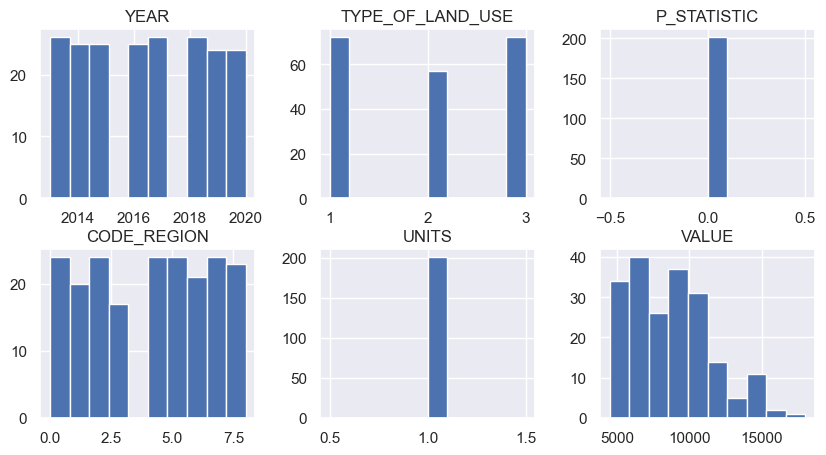

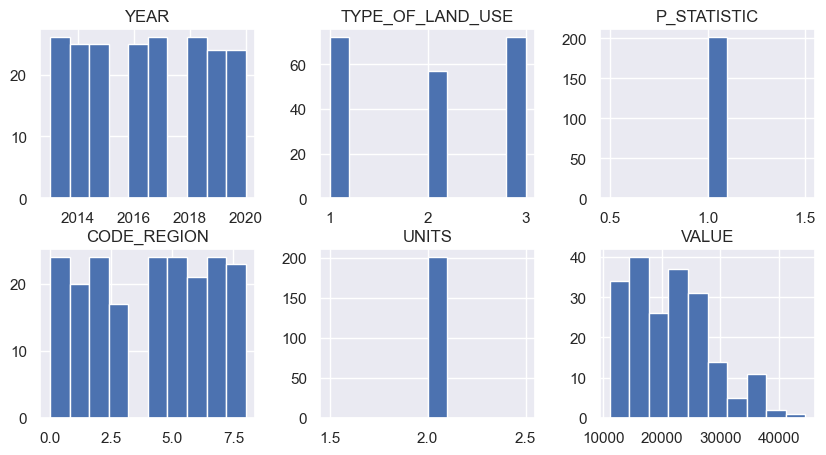

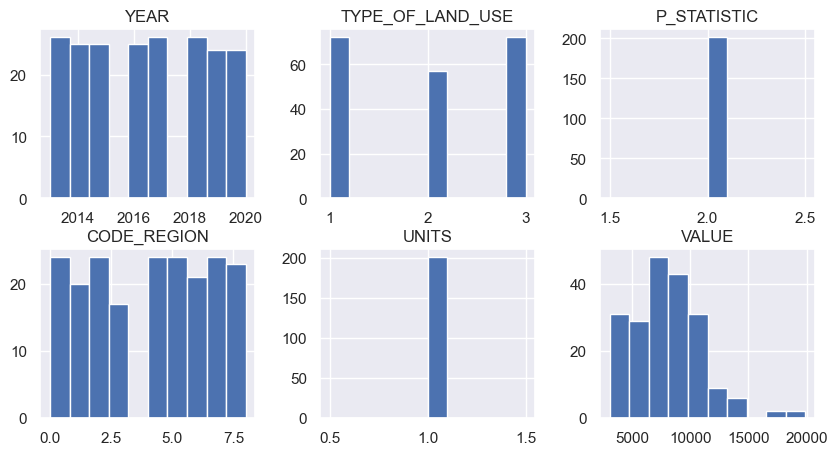

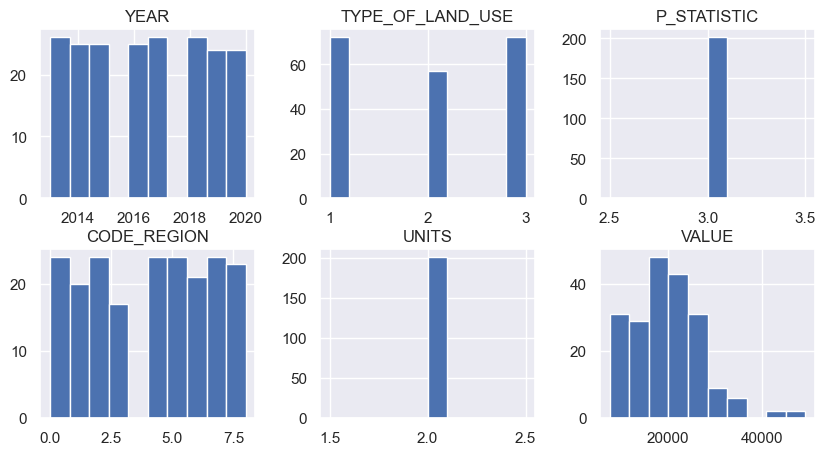

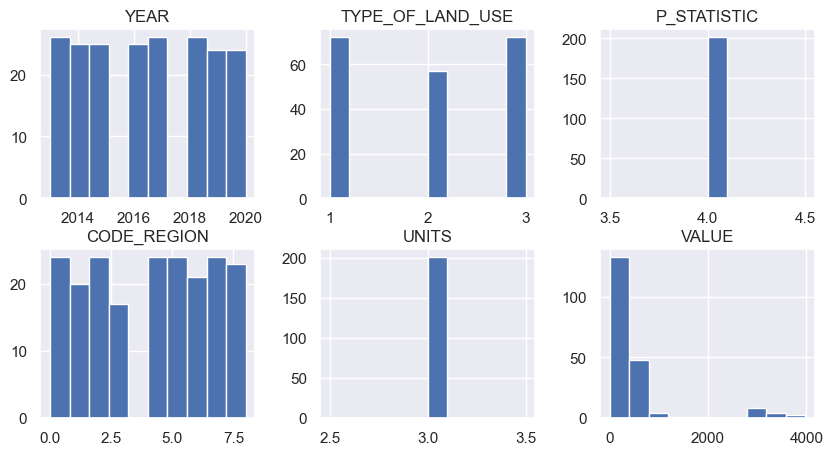

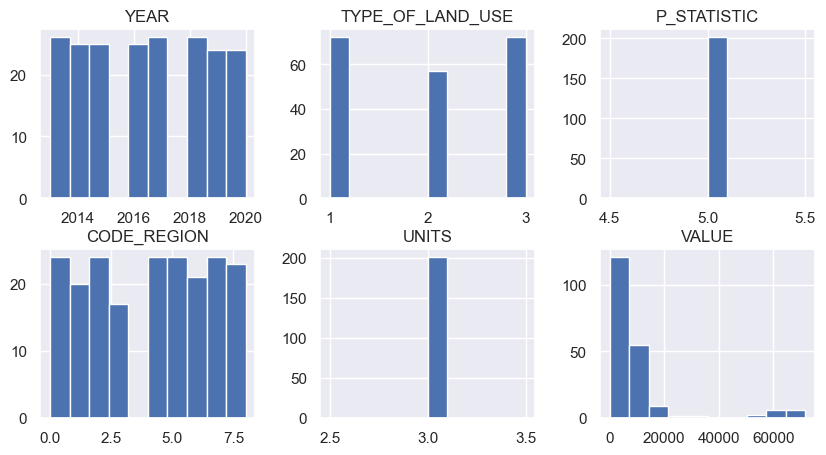

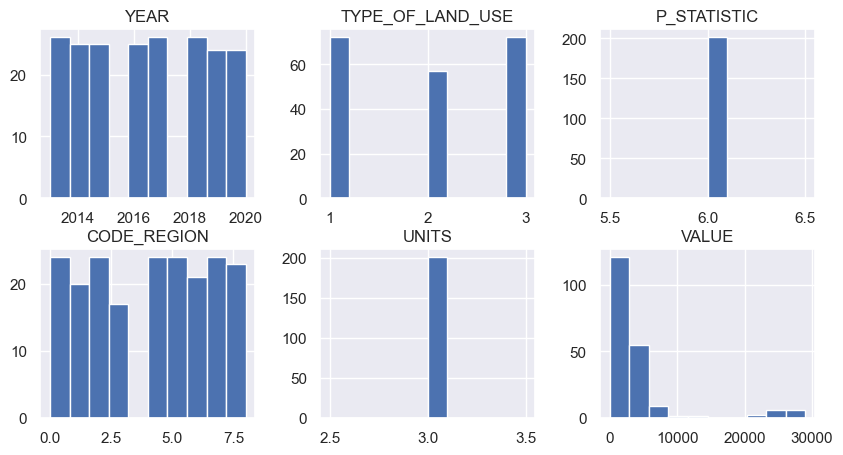

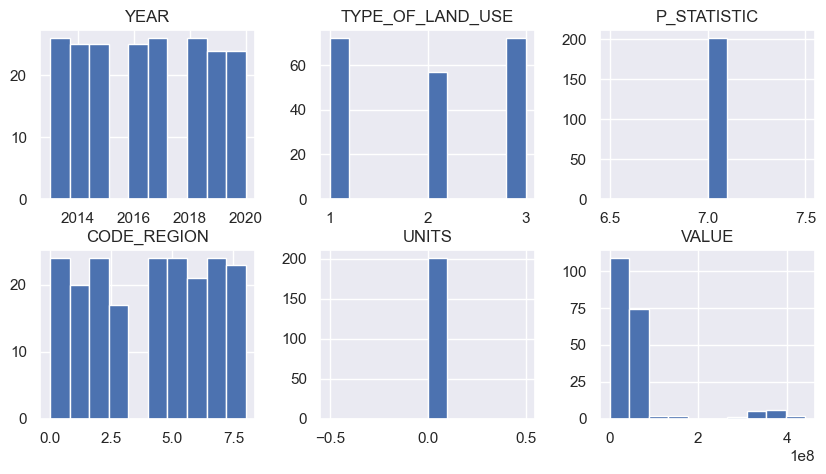

In [62]:
new_df.hist(figsize=(10,25),layout=(9,3));

P_STATISTIC
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
2    AxesSubplot(0.125,0.11;0.775x0.77)
3    AxesSubplot(0.125,0.11;0.775x0.77)
4    AxesSubplot(0.125,0.11;0.775x0.77)
5    AxesSubplot(0.125,0.11;0.775x0.77)
6    AxesSubplot(0.125,0.11;0.775x0.77)
7    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

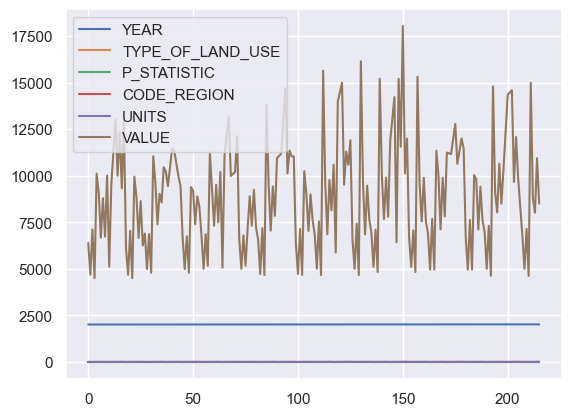

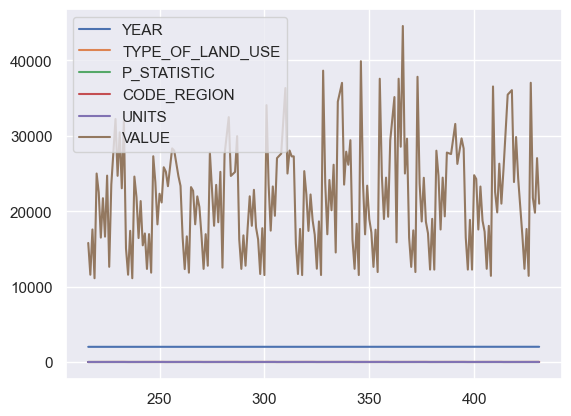

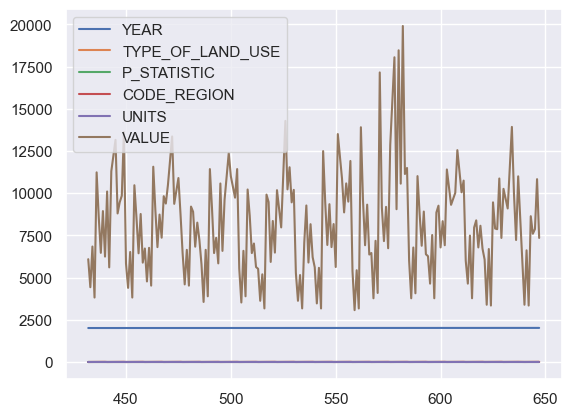

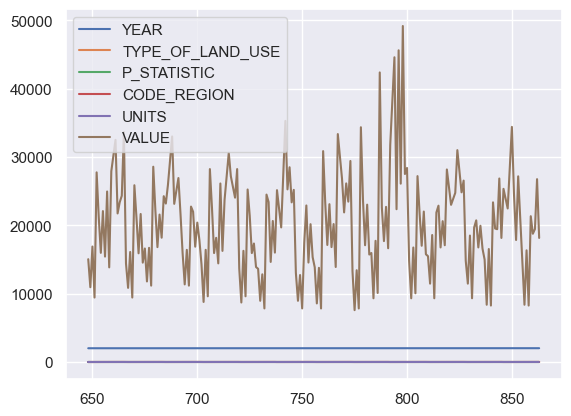

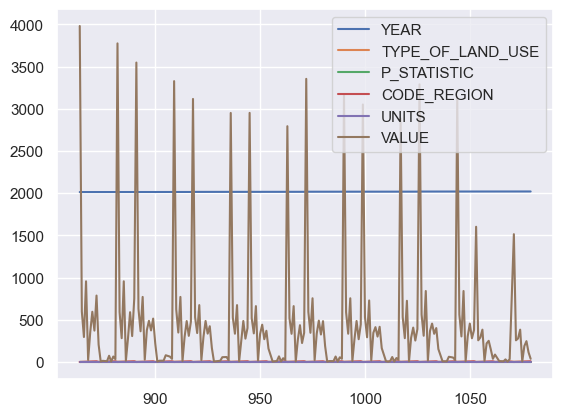

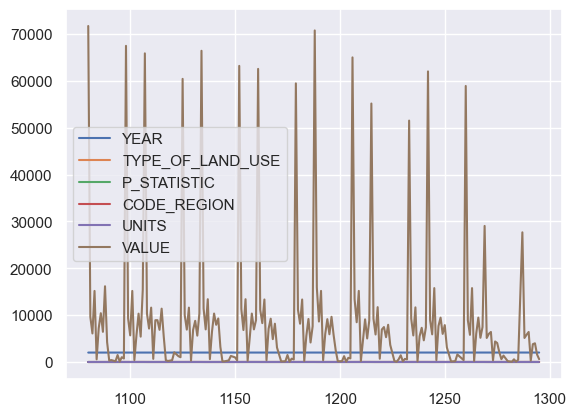

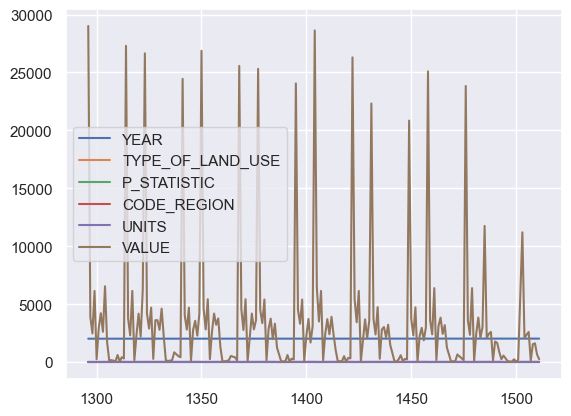

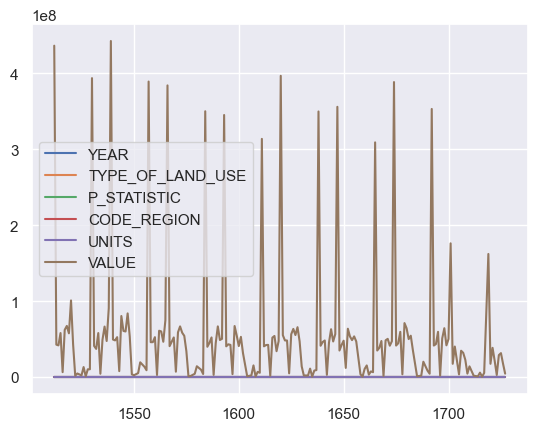

In [63]:
%matplotlib inline
groups.plot()

## Let's create a Dashboard 

### Pandas doesn't allow columns to be created via a new attribute name

In [64]:
#df['UNITS_per_EURO'] = np.where(df['UNITS']!= 0, df['VALUE']/ df['UNITS'], 0)

In [65]:
df[df['UNITS'] == 0]

,YEAR,TYPE_OF_LAND_USE,P_STATISTIC,CODE_REGION,UNITS,VALUE
1512,2013,1,7,0,0,4.364767e+08
1513,2013,1,7,1,0,4.264965e+07
1514,2013,1,7,2,0,4.166950e+07
1515,2013,1,7,3,0,5.788785e+07
1516,2013,1,7,4,0,6.395663e+06
...,...,...,...,...,...,...
1723,2020,3,7,4,0,2.670000e+06
1724,2020,3,7,5,0,2.886356e+07
1725,2020,3,7,6,0,3.145546e+07
1726,2020,3,7,7,0,1.739611e+07


In [66]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()

## Value over years by Statistic Label (Units)

In [67]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=2013, end=2020, step=1, value=2015)
year_slider

IntSlider(end=2020, name='Year slider', start=2013, value=2015)

In [68]:
# Radio buttons for Values
yaxis_VALUE = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['VALUE','CODE_REGION'],
    button_type='success'
)

In [69]:
df.group = [0]

VALUE_pipeline = (
    idf[
        (idf.YEAR <= year_slider) &
        (idf.UNITS.isin(df.group))
    ]
    .groupby(["UNITS","YEAR"])[yaxis_VALUE].mean()
    .to_frame()
    .reset_index()
    .sort_values(by="YEAR")  
    .reset_index(drop=True)
)

C:\Users\ele_9\AppData\Local\Temp\ipykernel_4844\3879894332.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.group = [0]


In [70]:
VALUE_pipeline

In [71]:
VALUE_plot = VALUE_pipeline.hvplot(x ='YEAR', by='UNITS', y=yaxis_VALUE,line_width=2, title="Value in Euro for Arable Land")
VALUE_plot

In [72]:
VALUE_table = VALUE_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
VALUE_table

In [73]:
VALUE_vs_CODE_REGION_scatterplot_pipeline = (
    idf[
        (idf.YEAR == year_slider) &
        (~ (idf.UNITS.isin(df.group)))
    ]
    .groupby(['UNITS', 'YEAR', 'CODE_REGION'])['VALUE'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='YEAR')  
    .reset_index(drop=True)
)

In [74]:
VALUE_vs_CODE_REGION_scatterplot_pipeline

In [75]:
VALUE_vs_CODE_REGION_scatterplot = VALUE_vs_CODE_REGION_scatterplot_pipeline.hvplot(x='VALUE', 
                                                                y='UNITS', 
                                                                by='CODE_REGION', 
                                                                size=80, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False, 
                                                                height=500, 
                                                                width=500)
VALUE_vs_CODE_REGION_scatterplot

### Bar chart with VALUE: Arable Land Sale Price in Euro during 2013-2020

In [76]:
yaxis_VALUE_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['CODE_REGION', 'P_STATISTIC'], 
    button_type='success'
)

df.group = [0,1,2,3]

VALUE_source_bar_pipeline = (
    idf[
        (idf.YEAR == year_slider) &
        (df.UNITS.isin(df.group))
    ]
    .groupby(['YEAR', 'UNITS'])[yaxis_VALUE_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='YEAR')  
    .reset_index(drop=True)
)

In [77]:
VALUE_source_bar_plot = VALUE_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='UNITS', 
                                                     y=yaxis_VALUE_source, 
                                                     title='Value source by Region')
VALUE_source_bar_plot

In [78]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Ireland Land Sale Values', 
    sidebar=[pn.pane.Markdown("# Ireland Land prices over the years"), 
             pn.pane.Markdown("#### Ireland has the fourth highest average land price in the EU at €25,724/ha, according to a new report by Eurostat. Among EU member states for which data is available, the Netherlands topped the table with an average of €69,632/ha in 2019 for arable land"), 
             pn.pane.PNG('irish-heart.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_VALUE, 
                           VALUE_plot.panel(width=700), margin=(0,25)), 
                 VALUE_table.panel(width=500)), 
          pn.Row(pn.Column(VALUE_vs_CODE_REGION_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_VALUE_source, VALUE_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();

<AxesSubplot: xlabel='YEAR'>

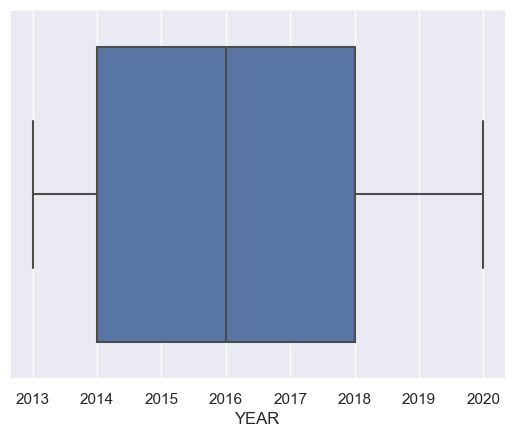

In [79]:
sns.boxplot(x=df["YEAR"])

In [80]:
df.head()

,YEAR,TYPE_OF_LAND_USE,P_STATISTIC,CODE_REGION,UNITS,VALUE
0,2013,1,0,0,1,6389.783163
1,2013,1,0,1,1,4685.224509
2,2013,1,0,2,1,7114.568810
3,2013,1,0,3,1,4496.514077
4,2013,1,0,4,1,10117.156674


## IDENTIFY TARGET VARIABLE

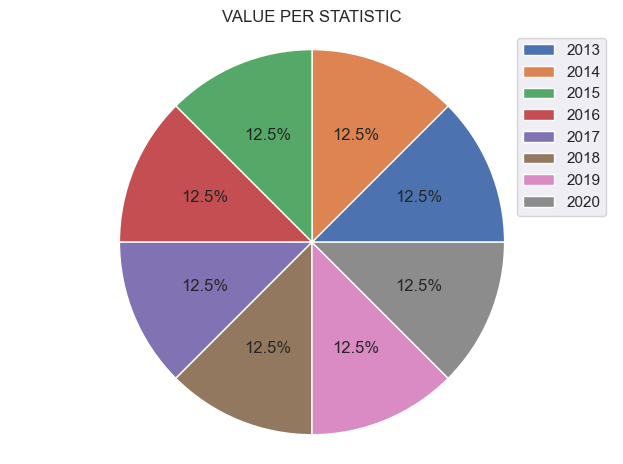

In [81]:
# Let's begin by looking at several graphs to find relationships.
# Pie chart indicating if P_STATISTIC 
plt.title("VALUE PER STATISTIC")
# Determine the results
data = df.pivot_table(index=["P_STATISTIC"],aggfunc="size") 
# Obtaining the name of the variables to plot
name = df.YEAR.unique() 
# Ordered and plotted counter-clockwise will be the slices.
plt.pie(data, autopct='%1.1f%%')
plt.legend(name, loc="best")
# Achieve an equivalent aspect ratio to make pie seem like a circle.
plt.axis("equal")
plt.tight_layout()
plt.show()

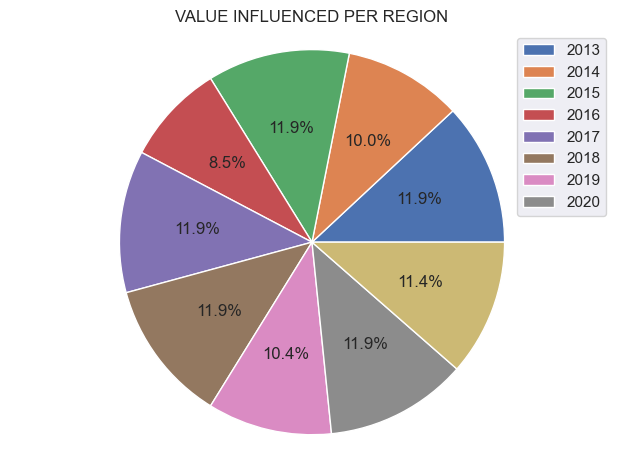

In [82]:
# Let's begin by looking at several graphs to find relationships.
# Pie chart indicating if P_STATISTIC 
plt.title("VALUE INFLUENCED PER REGION")
# Determine the results
data = df.pivot_table(index=["CODE_REGION"],aggfunc="size") 
# Obtaining the name of the variables to plot
name = df.YEAR.unique() 
# Ordered and plotted counter-clockwise will be the slices.
plt.pie(data, autopct='%1.1f%%')
plt.legend(name, loc="best")
# Achieve an equivalent aspect ratio to make pie seem like a circle.
plt.axis("equal")
plt.tight_layout()
plt.show()

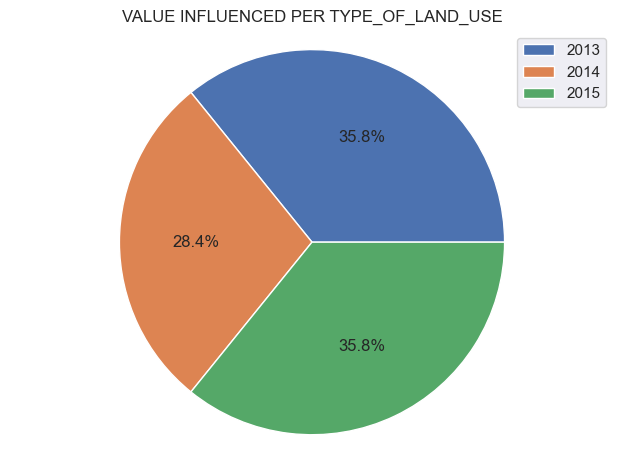

In [83]:
# Let's begin by looking at several graphs to find relationships.
# Pie chart indicating if P_STATISTIC 
plt.title("VALUE INFLUENCED PER TYPE_OF_LAND_USE")
# Determine the results
data = df.pivot_table(index=["TYPE_OF_LAND_USE"],aggfunc="size") 
# Obtaining the name of the variables to plot
name = df.YEAR.unique() 
# Ordered and plotted counter-clockwise will be the slices.
plt.pie(data, autopct='%1.1f%%')
plt.legend(name, loc="best")
# Achieve an equivalent aspect ratio to make pie seem like a circle.
plt.axis("equal")
plt.tight_layout()
plt.show()

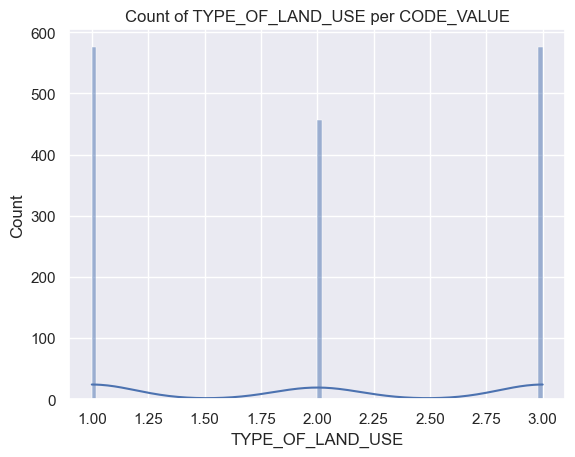

In [84]:
# Count of TYPE_OF_LAND_USE per VALUE
plt.title("Count of TYPE_OF_LAND_USE per CODE_VALUE")
sns.histplot(df.TYPE_OF_LAND_USE, kde=True, bins=100);

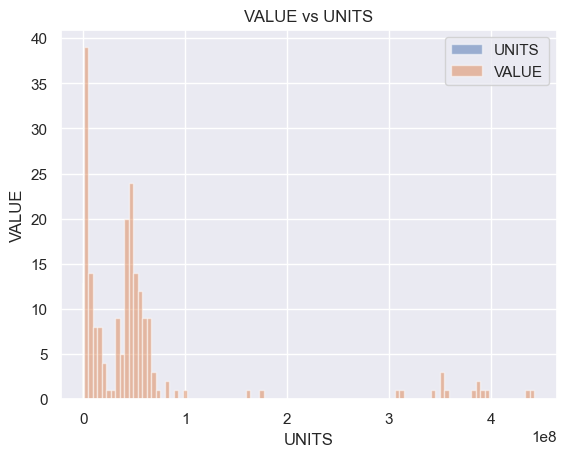

In [85]:
# VALUE vs TYPE_OF_LAND_USE 
plt.title("VALUE vs UNITS")
G1= df[df["UNITS"]==True] # Filter dataset by 
G1D = G1.loc[:,"VALUE"] # Filter dataset by StreetID
G2= df[df["UNITS"]==False] # Filter dataset by
G2D = G2.loc[:,"VALUE"] # Filter dataset by S
plt.hist(G1D, bins=100, alpha=0.5, label="UNITS")
plt.hist(G2D, bins=100, alpha=0.5, label="VALUE")
plt.xlabel("UNITS", size=12)
plt.ylabel("VALUE", size=12)
plt.legend(loc='upper right')
plt.show()

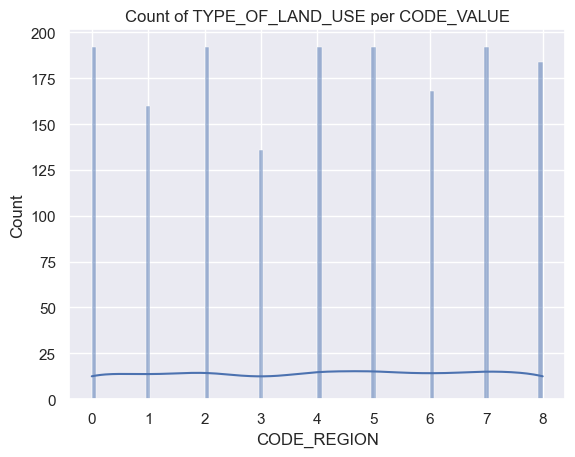

In [86]:
# Count of TYPE_OF_LAND_USE per VALUE
plt.title("Count of TYPE_OF_LAND_USE per CODE_VALUE")
sns.histplot(df.CODE_REGION, kde=True, bins=100);

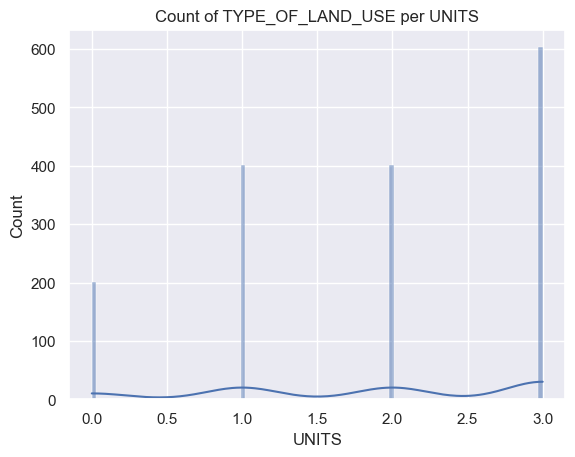

In [87]:
# Count of TYPE_OF_LAND_USE per VALUE
plt.title("Count of TYPE_OF_LAND_USE per UNITS")
sns.histplot(df.UNITS, kde=True, bins=100);

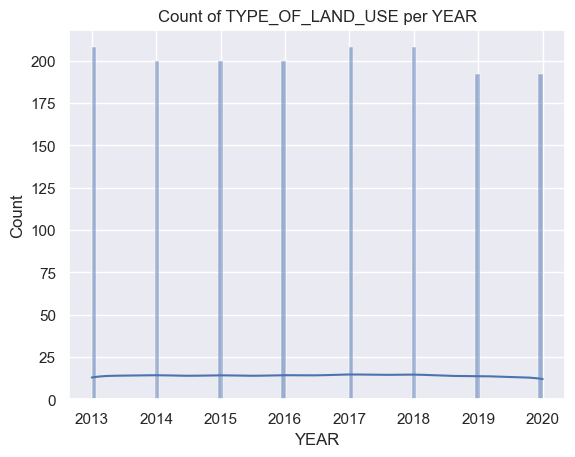

In [88]:
# Count of TYPE_OF_LAND_USE per VALUE
plt.title("Count of TYPE_OF_LAND_USE per YEAR")
sns.histplot(df.YEAR, kde=True, bins=100);

# Machine learning

### Data pre-processing

### Correlation

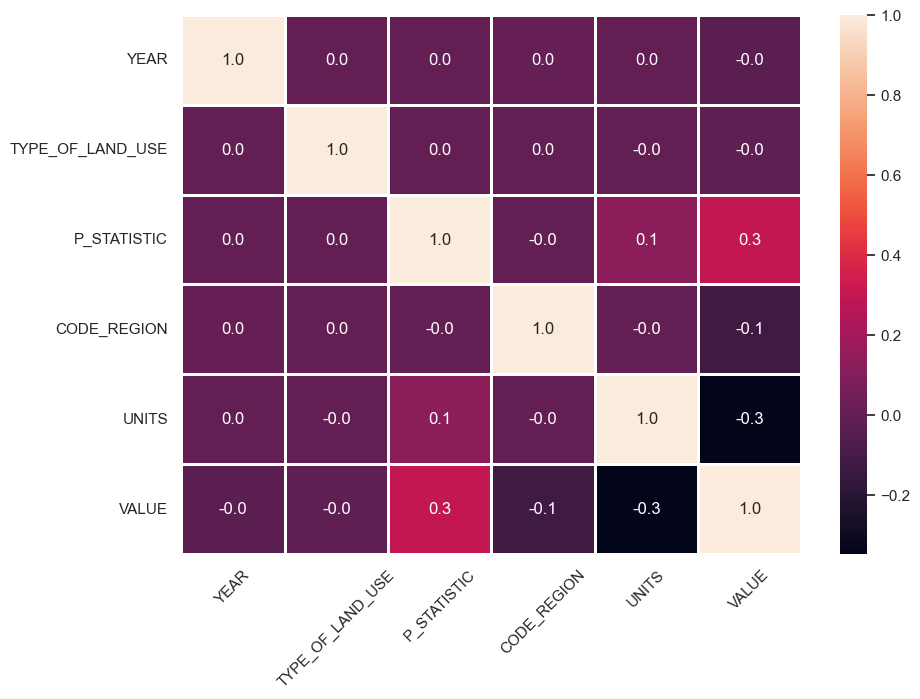

In [89]:
# Variables correlation - Pearson method
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(method='pearson'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

- ### Comments:
As can be seen from the graphs, there is a strong relationship between the target variable's UNITS

### Spearman method

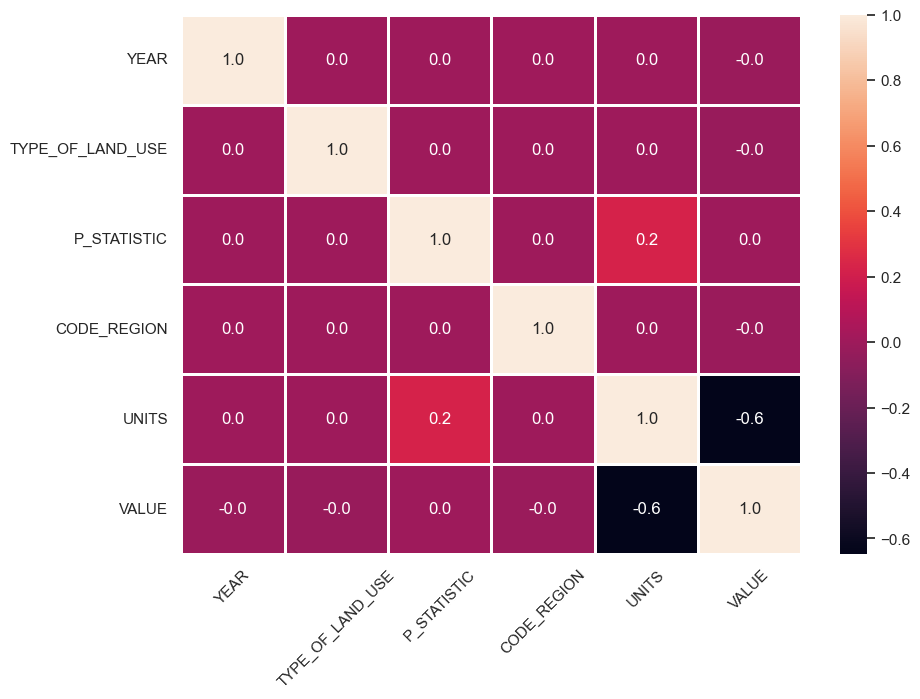

In [90]:
# correlation of the variables - Spearman method
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(method='spearman'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [91]:
# As we can see UNITS has a very strong relationship with VALUE, UNITS is dropped. 
# Stop_ID contains unics values that are not going to help us in Machine learning.
df.drop(columns=["UNITS"], inplace=True)

- ### Comments:
As we can notice there is  correlation between UNITS and the Target Variable, we will proceed to use One hot encoding method, this method is useful for data that has no relationship to each other.

## Let's continue with One Hot Encoding
### This approach of hot encoding is helpful for data that are unrelated to one another.



In [92]:
# Make dummy variables for the nominal categorical non-binary variables.
df_TP = pd.get_dummies(df,columns=["YEAR","P_STATISTIC", "CODE_REGION"])
# The dataset with dummies stored on a different variable to preserve the original since it could be relevant in the future.
df_TP 

,TYPE_OF_LAND_USE,VALUE,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,YEAR_2018,YEAR_2019,YEAR_2020,...,P_STATISTIC_7,CODE_REGION_0,CODE_REGION_1,CODE_REGION_2,CODE_REGION_3,CODE_REGION_4,CODE_REGION_5,CODE_REGION_6,CODE_REGION_7,CODE_REGION_8
0,1,6.389783e+03,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,4.685225e+03,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,7.114569e+03,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,4.496514e+03,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1.011716e+04,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,3,2.670000e+06,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1724,3,2.886356e+07,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1725,3,3.145546e+07,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1726,3,1.739611e+07,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [93]:
# The array variables X and y hold the independent and dependent variables, 
X = df_TP.drop(columns=["TYPE_OF_LAND_USE"]).values
# Store "At_Stop" feature into 'y'
y = df_TP["TYPE_OF_LAND_USE"].values
# Display X and y 
X, y

(array([[6.38978316e+03, 1.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.68522451e+03, 1.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [7.11456881e+03, 1.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [3.14554650e+07, 0.00000000e+00, 0.00000000e+00, ...,
         1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.73961122e+07, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
        [4.44646200e+06, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([1, 1, 1, ..., 3, 3, 3], dtype=int64))

## Cross-validation
- Before moving forward, we will divide the dataset into test and training sets in order to build and evaluate machine learning models.

In [94]:
# Load useful libraries
from sklearn.model_selection import train_test_split

# Split the data set into Training (75%) and Testing parts (25%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1608, 26), (1608,), (1206, 26), (402, 26), (1206,), (402,))

In [95]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# It will cut down on repetitious code because will plot a roc curve for each model in the next function.
# roc curve 
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='blue', label='ROC')
    plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## MULTICLASIFICATION

In [123]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [120]:
ovo_clf = OneVsOneClassifier(SGDClassifier())

In [122]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier())

In [125]:
ovo_clf.estimators_

(SGDClassifier(), SGDClassifier(), SGDClassifier())

In [ ]:
forest_clf = RandomForestClassifier()

In [114]:
sgd_classifier.fit(X_train, y_train)

NameError: name 'sgd_classifier' is not defined

### Naive Bayes

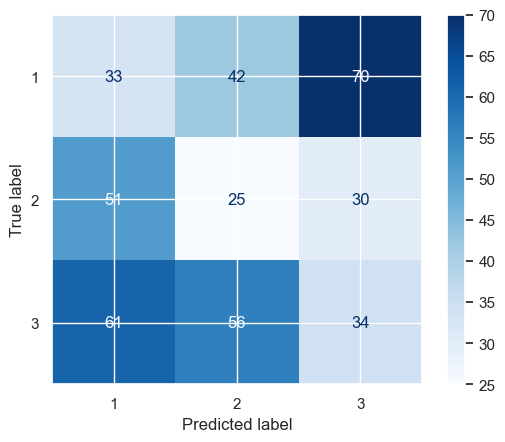

In [96]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
probs = model.predict(X_test) 

# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues');

In [97]:
# Naive Bayes classification report
report = classification_report(y_test,probs)
print(report)

              precision    recall  f1-score   support

           1       0.23      0.23      0.23       145
           2       0.20      0.24      0.22       106
           3       0.25      0.23      0.24       151

    accuracy                           0.23       402
   macro avg       0.23      0.23      0.23       402
weighted avg       0.23      0.23      0.23       402



## Decision Tree

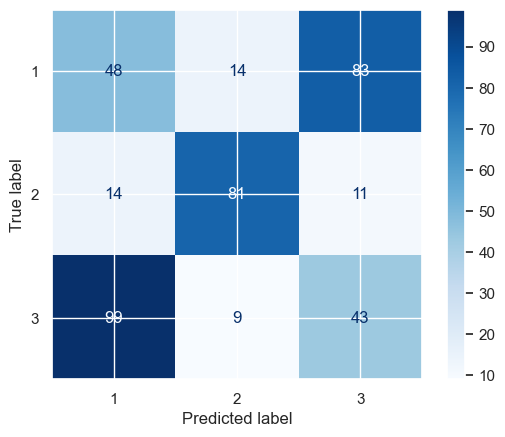

In [129]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', # criterio usado
                                    max_leaf_nodes = None,
                                    min_samples_split = 2,
                                    max_features = None,
                                    random_state = 0)
model.fit(X_train, y_train)
probs = model.predict(X_test)

# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues');

In [130]:
# Decision Tree classification report
report = classification_report(y_test,probs)
print(report)

              precision    recall  f1-score   support

           1       0.30      0.33      0.31       145
           2       0.78      0.76      0.77       106
           3       0.31      0.28      0.30       151

    accuracy                           0.43       402
   macro avg       0.46      0.46      0.46       402
weighted avg       0.43      0.43      0.43       402



## KNN

C:\Users\ele_9\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ele_9\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

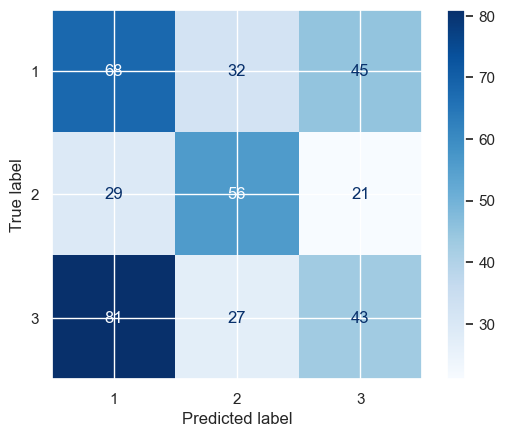

In [200]:
from sklearn.neighbors import KNeighborsClassifier
# Change: 7=5
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p =2) 
model.fit(X_train, y_train)
probs = model.predict(X_test)
# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues');

In [201]:
# KNN classification report
report = classification_report(y_test,probs)
print(report)

              precision    recall  f1-score   support

           1       0.38      0.47      0.42       145
           2       0.49      0.53      0.51       106
           3       0.39      0.28      0.33       151

    accuracy                           0.42       402
   macro avg       0.42      0.43      0.42       402
weighted avg       0.41      0.42      0.41       402



# ROC Curve
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc_knn = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

## Random Forest

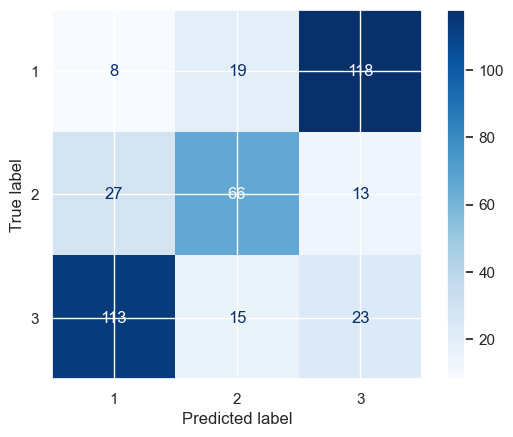

In [108]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
probs = model.predict(X_test)

# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues');

In [109]:
# Random forest classification report
report = classification_report(y_test,probs)
print(report)

              precision    recall  f1-score   support

           1       0.05      0.06      0.05       145
           2       0.66      0.62      0.64       106
           3       0.15      0.15      0.15       151

    accuracy                           0.24       402
   macro avg       0.29      0.28      0.28       402
weighted avg       0.25      0.24      0.25       402



# ROC Curve
model = LogisticRegression(multi_class='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc_rf = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

## Logistic Regression

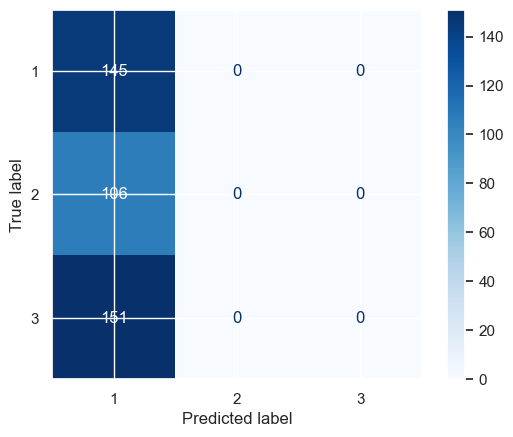

In [134]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
probs = model.predict(X_test)

# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues');

In [135]:
# Logistic regression classification report
report = classification_report(y_test,probs)
print(report)

              precision    recall  f1-score   support

           1       0.36      1.00      0.53       145
           2       0.00      0.00      0.00       106
           3       0.00      0.00      0.00       151

    accuracy                           0.36       402
   macro avg       0.12      0.33      0.18       402
weighted avg       0.13      0.36      0.19       402



C:\Users\ele_9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ele_9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ele_9\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)


## Linear SVM

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', random_state = 0, probability=True)
model.fit(X_train, y_train)
probs = model.predict(X_test)

# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,cmap='Blues');

In [ ]:
# SVM classification report
report = classification_report(y_test,probs)
print(report)

In [ ]:
# ROC Curve
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc_svm = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

## Let's see final results

In [ ]:
# Results
Results = [['Logistic Regression',auc_lr],['Decision Tree',auc_tree], ['Support Vector Machine',auc_svm],
          ['Random Forest',auc_rf],['K-Nearest Neighbors',auc_knn],['Naive Bayes',auc_nb]]

# Create the pandas DataFrame
df_results = pd.DataFrame(Results, columns=['Models', 'AUC'])

# print AUC results
df_results.sort_values(by=['AUC'],ascending=False)

## Let's start with the comparison between Ireland and Europe

In [147]:
df_C = pd.read_csv("apri_lprc__custom_4355786_linear.csv.gz")

In [148]:
df_C.head()

,DATAFLOW,LAST UPDATE,freq,unit,agriprod,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:APRI_LPRC(1.0),21/12/22 11:00:00,A,EUR_HA,ARA,BE,2013,36591,e
1,ESTAT:APRI_LPRC(1.0),21/12/22 11:00:00,A,EUR_HA,ARA,BE,2014,38496,e
2,ESTAT:APRI_LPRC(1.0),21/12/22 11:00:00,A,EUR_HA,ARA,BG,2013,3175,NaN
3,ESTAT:APRI_LPRC(1.0),21/12/22 11:00:00,A,EUR_HA,ARA,BG,2014,3620,NaN
4,ESTAT:APRI_LPRC(1.0),21/12/22 11:00:00,A,EUR_HA,ARA,BG,2015,3891,NaN


In [149]:
df_C["OBS_VALUE"]

0      36591
1      38496
2       3175
3       3620
4       3891
       ...  
169    26634
170    30292
171    25730
172    23450
173    23412
Name: OBS_VALUE, Length: 174, dtype: int64

In [150]:
df_C.isnull().sum()

DATAFLOW         0
LAST UPDATE      0
freq             0
unit             0
agriprod         0
geo              0
TIME_PERIOD      0
OBS_VALUE        0
OBS_FLAG       148
dtype: int64

In [151]:
df_C.count()

DATAFLOW       174
LAST UPDATE    174
freq           174
unit           174
agriprod       174
geo            174
TIME_PERIOD    174
OBS_VALUE      174
OBS_FLAG        26
dtype: int64

In [152]:
# Indentify the values for geo
df_C["geo"].value_counts()

IE    8
SI    8
RO    8
PL    8
NL    8
LV    8
LU    8
LT    8
IT    8
BG    8
HU    8
SK    8
FR    8
FI    8
ES    8
EL    8
EE    8
DK    8
CZ    8
SE    8
UK    6
HR    6
BE    2
Name: geo, dtype: int64

In [153]:
# Indentify the values for OBS_VALUE
df_C["OBS_VALUE"].value_counts()

18752    2
6000     2
4182     2
36591    1
3856     1
        ..
5770     1
5940     1
6070     1
6030     1
23412    1
Name: OBS_VALUE, Length: 171, dtype: int64

In [160]:
# Indentify the values for OBS_FLAG
df_C["OBS_FLAG"].value_counts()

e    18
b     5
d     3
Name: OBS_FLAG, dtype: int64

In [159]:
# Indentify the values for OBS_VALUE
df_C["freq"].value_counts()

A    174
Name: freq, dtype: int64

In [154]:
# Indentify the values for TIME PERIOD
df_C["TIME_PERIOD"].value_counts()

2013    22
2014    22
2015    22
2016    22
2017    22
2018    22
2019    21
2020    21
Name: TIME_PERIOD, dtype: int64

In [155]:
# Indentify the values for unit
df_C["unit"].value_counts()

EUR_HA    174
Name: unit, dtype: int64

In [156]:
# Indentify the values for agriprod
df_C["agriprod"].value_counts()

ARA    174
Name: agriprod, dtype: int64

In [157]:
df_C.describe()

,TIME_PERIOD,OBS_VALUE
count,174.000000,174.00000
mean,2016.465517,14598.54023
std,2.287555,14997.00235
min,2013.000000,1653.00000
25%,2014.250000,4128.00000
50%,2016.000000,8697.00000
75%,2018.000000,18679.00000
max,2020.000000,71225.00000


In [158]:
df_C.tail()

,DATAFLOW,LAST UPDATE,freq,unit,agriprod,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
169,ESTAT:APRI_LPRC(1.0),21/12/22 11:00:00,A,EUR_HA,ARA,UK,2014,26634,e
170,ESTAT:APRI_LPRC(1.0),21/12/22 11:00:00,A,EUR_HA,ARA,UK,2015,30292,e
171,ESTAT:APRI_LPRC(1.0),21/12/22 11:00:00,A,EUR_HA,ARA,UK,2016,25730,e
172,ESTAT:APRI_LPRC(1.0),21/12/22 11:00:00,A,EUR_HA,ARA,UK,2017,23450,e
173,ESTAT:APRI_LPRC(1.0),21/12/22 11:00:00,A,EUR_HA,ARA,UK,2018,23412,NaN


## Defining variables

- DATAFLOW: Categorical variable, Unique Variable "ESTAT:APRI_LPRC(1.0)"

- LAST UPDATE: Categorical variable, Refering to Date and Time..

- freq: Categorical variable, Unique Variable "A"

- unit: Categorical variable, Unique Variable = Unique Variable "EUR_HA" in regards to the unit consider Euro per Hectare

- agriprod: Categorical variable, Unique Variable = Unique Variable "ARA" in regards to the type of land.

- TIME_PERIOD: Numerical Variable, Variable = min 2013, max 2020.

- OBS_VALUE: Numerical Variable, Variable = min 1653.00000, max 71225.00000.

- OBS_FLAG: Categorical variable, The variable contains just 2 categories.

In [162]:
# After exploring every column and feature we decide to drop the columns with unic values, which are not providing any adicional value to the analysis. 

df_C.drop(columns=["DATAFLOW", "LAST UPDATE", "freq", "OBS_FLAG", "unit", "agriprod"], inplace=True) 

In [163]:
df_C.dtypes

geo            object
TIME_PERIOD     int64
OBS_VALUE       int64
dtype: object

In [164]:
df_C["geo"] = le.fit_transform(df_C.geo)

In [165]:
# Let's rename the columns to avoid spaces, also It will help us with our analysis. 
df_C = df_C.rename(columns={"geo": "COUNTRY", "OBS_VALUE": "VALUE"})

In [166]:
# Checking updates for Nun Values
df_C.isnull().sum()

COUNTRY        0
TIME_PERIOD    0
VALUE          0
dtype: int64

In [167]:
df_C.describe()

,COUNTRY,TIME_PERIOD,VALUE
count,174.000000,174.000000,174.00000
mean,11.275862,2016.465517,14598.54023
std,6.409331,2.287555,14997.00235
min,0.000000,2013.000000,1653.00000
25%,6.000000,2014.250000,4128.00000
50%,11.000000,2016.000000,8697.00000
75%,17.000000,2018.000000,18679.00000
max,22.000000,2020.000000,71225.00000


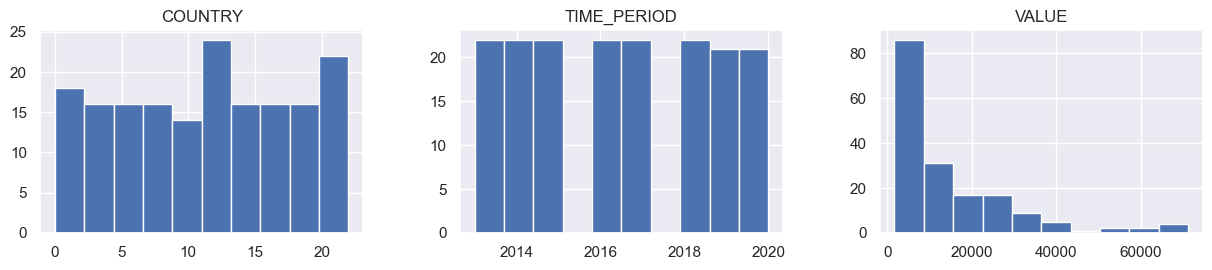

In [170]:
df_C.hist(figsize=(15,30),layout=(9,3));

## Let's start scaling the Value Feature¶

In [175]:
df_C["minmax"]=preproc.minmax_scale(df_C[["VALUE"]])

In [176]:
# Indentify the values for Statistic
df_C["minmax"].value_counts()

0.245774    2
0.062482    2
0.036351    2
0.502185    1
0.031665    1
           ..
0.059176    1
0.061620    1
0.063488    1
0.062913    1
0.312755    1
Name: minmax, Length: 171, dtype: int64

In [177]:
df_C["minmax"]

0      0.502185
1      0.529566
2      0.021877
3      0.028273
4      0.032168
         ...   
169    0.359067
170    0.411645
171    0.346073
172    0.313301
173    0.312755
Name: minmax, Length: 174, dtype: float64

In [178]:
df_C["standardized"]=preproc.StandardScaler().fit_transform(df_C[["VALUE"]])

In [179]:
df_C["standardized"].value_counts()

 0.277752    2
-0.575005    2
-0.696579    2
 1.470689    1
-0.718380    1
            ..
-0.590386    1
-0.579018    1
-0.570324    1
-0.572999    1
 0.589377    1
Name: standardized, Length: 171, dtype: int64

In [181]:
df_C["l2_normalized"]= preproc.normalize(df_C[["VALUE"]], axis=0)

In [182]:
df_C["l2_normalized"].value_counts()

0.068024    2
0.021765    2
0.015171    2
0.132737    1
0.013988    1
           ..
0.020931    1
0.021548    1
0.022019    1
0.021874    1
0.084929    1
Name: l2_normalized, Length: 171, dtype: int64

## Let's confirm that we are presenting the same information, without afecting the real values.

Text(85.0, 0.5, 'Number of articles')

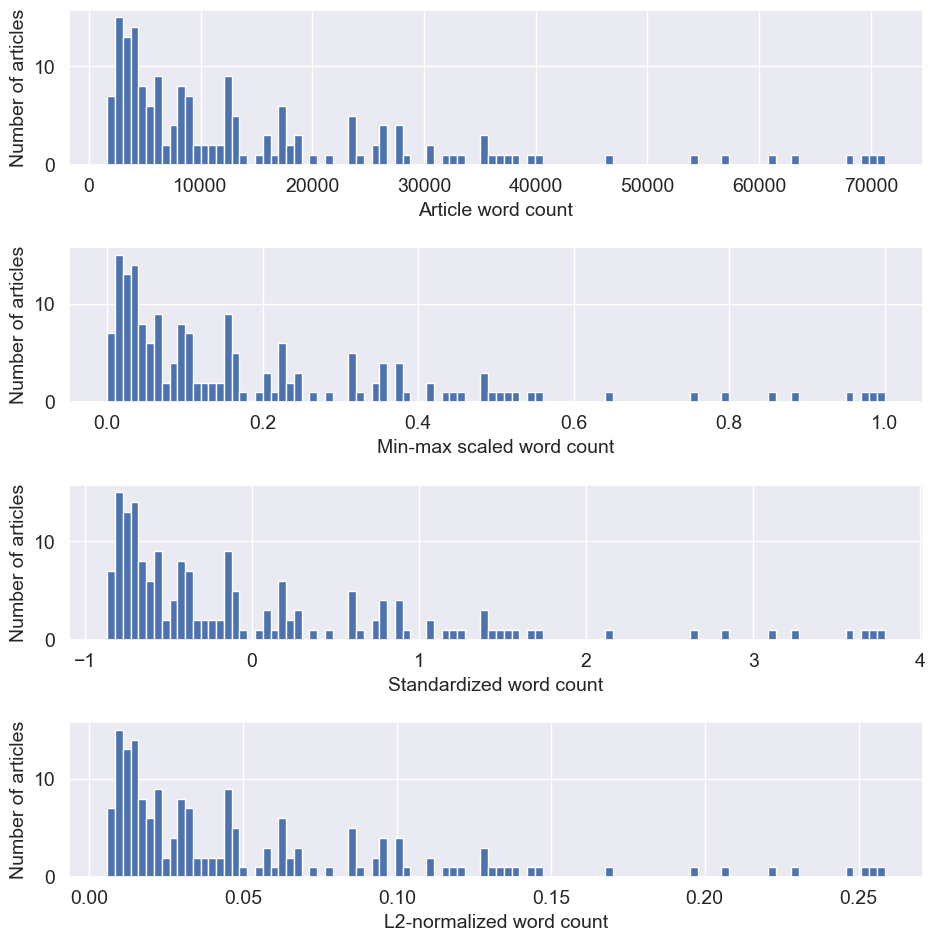

In [183]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(10, 10))
fig.tight_layout(pad=3.0)
df_C['VALUE'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df_C['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df_C['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

df_C['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14)

In [184]:
df_C.dtypes

COUNTRY            int32
TIME_PERIOD        int64
VALUE              int64
minmax           float64
standardized     float64
l2_normalized    float64
dtype: object

In [185]:
df_C.head()

,COUNTRY,TIME_PERIOD,VALUE,minmax,standardized,l2_normalized
0,0,2013,36591,0.502185,1.470689,0.132737
1,0,2014,38496,0.529566,1.598081,0.139647
2,1,2013,3175,0.021877,-0.763920,0.011518
3,1,2014,3620,0.028273,-0.734162,0.013132
4,1,2015,3891,0.032168,-0.716039,0.014115


In [205]:
df_C.describe()

,COUNTRY,TIME_PERIOD,VALUE,minmax,standardized,l2_normalized
count,174.000000,174.000000,174.00000,174.000000,1.740000e+02,174.000000
mean,11.275862,2016.465517,14598.54023,0.186074,6.508204e-17,0.052957
std,6.409331,2.287555,14997.00235,0.215561,1.002886e+00,0.054403
min,0.000000,2013.000000,1653.00000,0.000000,-8.656997e-01,0.005996
25%,6.000000,2014.250000,4128.00000,0.035575,-7.001905e-01,0.014975
50%,11.000000,2016.000000,8697.00000,0.101248,-3.946503e-01,0.031549
75%,17.000000,2018.000000,18679.00000,0.244725,2.728703e-01,0.067759
max,22.000000,2020.000000,71225.00000,1.000000,3.786749e+00,0.258374


In [206]:
df_C.shape

(174, 6)

In [193]:
land_sale_Europe = df_C

In [195]:
# print records for each value of the feature 'VALUE'
df_2020 = land_sale_Europe[(land_sale_Europe.TIME_PERIOD == 2020)]
df_2020.VALUE.value_counts()


5328     1
35447    1
21451    1
10100    1
7163     1
10711    1
71225    1
4182     1
46500    1
4127     1
25724    1
9477     1
4893     1
3440     1
6080     1
8524     1
12901    1
12599    1
3772     1
17491    1
3984     1
Name: VALUE, dtype: int64

# Hypothesis Tests 

In [202]:
# Generate an array of 40 values that follow a N(30, 5) distribution
from numpy import random
random.seed(20)
out = random.normal(loc=30, scale=5, size=40)
out

array([34.41946556, 30.97932511, 31.78768258, 18.28369047, 24.57583706,
       32.79848145, 34.69734675, 25.10759479, 32.5154842 , 32.03207234,
       31.61730505, 27.53294559, 26.03991605, 25.78816033, 23.60248669,
       31.22857585, 29.779026  , 37.83816276, 35.2555434 , 32.03184213,
       29.15676949, 14.05148605, 35.6006613 , 36.66389104, 28.78330617,
       29.34984644, 29.45491314, 37.7809322 , 30.64389176, 19.66525639,
       25.57253423, 24.47710258, 34.66433173, 40.29919001, 25.32531021,
       21.93504891, 32.63534859, 22.24449632, 31.6480667 , 24.3173673 ])

Imagine that we do not know where the data comes from.

- We want to test a hypothesis about the mean.
- We know from a previous study that the average value of this variable is 30.
- We suspect that we have evidence that the population mean is no longer 30.
- First, we should find the sample mean:

In [203]:
out.mean()

29.30451736817472

The sample mean is different from 30, but this is not sufficient evidence for us to conclude that the population mean is not 30. We need to perform a hypothesis test to check this.

In [204]:
from scipy import stats

# Run the test:
stats.ttest_1samp(out, popmean=30)

Ttest_1sampResult(statistic=-0.7675357989912076, pvalue=0.4473852093059407)

In [207]:
# We need to evaluate (xbar - mu) / SE
# or written out fully, (xbar - mu) / (s / sqrt(n))
import math
import statistics
xbar = out.mean()
s = statistics.stdev(out)
n = len(out)
mu = 30
(xbar - mu) / (s / math.sqrt(n))

-0.7675357989912076

In [208]:
 Producing a plot of the data:
import matplotlib.pyplot as plt
result = plt.hist(out, bins=6, color='c', edgecolor='k', alpha=0.65)
plt.axvline(out.mean(), color='k', linestyle='dashed', linewidth=2) # Sample mean
plt.axvline(mu, color='red', linestyle='solid', linewidth=2) # Hypothesised mu

SyntaxError: invalid syntax (3789183951.py, line 1)

In [209]:
# We just need to run:
from scipy import stats
stats.ttest_1samp(out, popmean=30, alternative = "greater")

Ttest_1sampResult(statistic=-0.7675357989912076, pvalue=0.7763073953470296)